In [45]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

In [46]:
# Market Share for Each Genre 1995-2020

In [47]:
html_page = requests.get('https://www.the-numbers.com/market/genres')
soup = BeautifulSoup(html_page.content,'html.parser')

In [48]:
table=soup.find('table')


In [288]:
genres=pd.read_html(str(table))[0]
genres.head(2)

,Rank,Genre,Movies,Total Box Office,Tickets,Share
0,1,Adventure,1064,"$63,774,679,468",9133100587,27.33%
1,2,Action,1027,"$47,445,372,974",6732270946,20.33%


In [50]:
genres['Total Box Office'] = genres['Total Box Office'].replace({'\$': ''}, regex=True)
genres['Share'] = genres['Share'].replace({'%': ''}, regex=True)

In [52]:
# convert dframe to tuple
tuple_genres=list(genres.itertuples(index=False,name=None))


In [53]:
import mysql.connector
from mysql.connector import errorcode
import config
cnx = mysql.connector.connect(
    host = config.my_cred['host'],
    user = config.my_cred['user'],
    passwd = config.my_cred['passwd']
)
print(config.my_cred['user'])
print(cnx)

admin


In [54]:
cursor = cnx.cursor()

In [55]:
db_name = 'movies'

In [56]:
def create_database(cursor, database):
    try:
        cursor.execute(
            "CREATE DATABASE {} DEFAULT CHARACTER SET 'utf8'".format(database))
    except mysql.connector.Error as err:
        print("Failed creating database: {}".format(err))
        exit(1)

In [57]:
try:
    cursor.execute("USE {}".format(db_name))

#if the previous line fails because there isn't a db by that name run this line

except mysql.connector.Error as err:
    print("Database {} does not exists.".format(db_name))
    if err.errno == errorcode.ER_BAD_DB_ERROR:
        create_database(cursor, db_name)
        print("Database {} created successfully.".format(db_name))
        cnx.database = db_name
    else:
        print(err)
        exit(1)

In [62]:
DB_NAME = 'movies'

TABLES = {}
TABLES['genre'] = (
    "CREATE TABLE genre ("
    "  R_id varchar(20) NOT NULL,"
    "  Genre varchar(190) NOT NULL,"
    "  Movies int(190) NOT NULL,"
    "  Total_Box_Office varchar(50) NOT NULL,"
    "  Tickets int(50) NOT NULL,"
    "  Share double(10,2) NOT NULL,"
    "  PRIMARY KEY (R_id)"
    ") ENGINE=InnoDB")



In [64]:
try:
    cursor.execute("USE {}".format(DB_NAME))

#if the previous line fails because there isn't a db by that name run this line

except mysql.connector.Error as err:
    print("Database {} does not exists.".format(DB_NAME))
    if err.errno == errorcode.ER_BAD_DB_ERROR:
        create_database(cursor, DB_NAME)
        print("Database {} created successfully.".format(DB_NAME))
        cnx.database = DB_NAME
    else:
        print(err)
        exit(1)
        
for table_name in TABLES:
    table_description = TABLES[table_name]
    try:
        print("Creating table {}: ".format(table_name), end='')
        cursor.execute(table_description)
    except mysql.connector.Error as err:
        if err.errno == errorcode.ER_TABLE_EXISTS_ERROR:
            print("already exists.")
        else:
            print(err.msg)
    else:
        print("OK")

# cursor.close()
# cnx.close()

Creating table genre: already exists.


In [67]:
import mysql.connector
from mysql.connector import errorcode
import config
cnx = mysql.connector.connect(
    host = config.my_cred['host'],
    user = config.my_cred['user'],
    passwd = config.my_cred['passwd']
)
cnx.database = 'movies'
print(cnx)

In [68]:
# cursor.close()
# cnx.close()

In [69]:
import mysql.connector
from mysql.connector import errorcode
import config
cnx = mysql.connector.connect(
    host = config.my_cred['host'],
    user = config.my_cred['user'],
    passwd = config.my_cred['passwd']
)
cnx.database = 'movies'
print(cnx)

In [70]:
cursor = cnx.cursor()

In [71]:
cursor.executemany(
      """INSERT INTO genre(R_id, Genre, Movies, Total_Box_Office, Tickets, Share)
      VALUES (%s, %s, %s, %s, %s, %s)""",
      tuple_genres)
cnx.commit()

IntegrityError: 1062 (23000): Duplicate entry '1' for key 'PRIMARY'

In [72]:
# individual genre

In [25]:
list_gener = []

for genre in genres['Genre']:
    genre_url='https://www.the-numbers.com/market/genre/'+genre.replace('/','-or-').replace(' ','-')
    res=requests.get(genre_url)
    soup=BeautifulSoup(res.text,'html.parser')
    tables=soup.find_all('table')
    df2=pd.read_html(str(tables[1]))[0]
    df2['Genre']=genre
    list_gener.append(df2)
for df in list_gener:
        df['Id'] = df['Year'].apply(str).add(df['Genre'])

In [27]:
df_genre=pd.concat(list_gener)
df_genre

,Year,Movies inRelease,MarketShare,Gross,Tickets Sold,Inflation-AdjustedGross,Top-Grossing Movie,Gross that Year,Genre,Id
0,1995,29,14.52%,"$771,507,571",177358047,"$1,615,731,808",Toy Story,"$150,148,222",Adventure,1995Adventure
1,1996,34,22.37%,"$1,290,490,033",291966054,"$2,659,810,752",Independence Day,"$306,169,255",Adventure,1996Adventure
2,1997,23,13.87%,"$881,902,843",192135684,"$1,750,356,081",Men in Black,"$250,650,052",Adventure,1997Adventure
3,1998,29,23.84%,"$1,614,467,732",344236174,"$3,135,991,545",Armageddon,"$201,578,182",Adventure,1998Adventure
4,1999,27,21.97%,"$1,612,432,107",317407880,"$2,891,585,787",Star Wars Ep. I: The Phanto…,"$430,443,350",Adventure,1999Adventure
...,...,...,...,...,...,...,...,...,...,...
16,2017,5,0.04%,"$4,614,134",514394,"$4,686,129",2017 Oscar Shorts,"$2,835,355",Multiple Genres,2017Multiple Genres
17,2018,3,0.04%,"$4,787,450",525514,"$4,787,433",2018 Oscar Shorts,"$3,508,777",Multiple Genres,2018Multiple Genres
18,2019,2,0.03%,"$3,545,060",389139,"$3,545,056",2019 Oscar Shorts,"$3,531,093",Multiple Genres,2019Multiple Genres
0,2014,1,0.00%,"$16,826",2059,"$18,757",The Principle,"$16,826",Reality,2014Reality


In [283]:
df_genre_sub = df_genre[['Year','Genre','MarketShare']]

In [284]:
df_genre_sub['MarketShare'] = df_genre_sub['MarketShare'].str.replace('%', '')
df_genre_sub['MarketShare'] = pd.to_numeric(df_genre_sub['MarketShare'], errors='coerce')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [260]:
df_genre_sub['MarketShare']=df_genre_sub['MarketShare']/100

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [285]:
df_genre_sub

,Year,Genre,MarketShare
0,1995,Adventure,14.52
1,1996,Adventure,22.37
2,1997,Adventure,13.87
3,1998,Adventure,23.84
4,1999,Adventure,21.97
...,...,...,...
16,2017,Multiple Genres,0.04
17,2018,Multiple Genres,0.04
18,2019,Multiple Genres,0.03
0,2014,Reality,0.00


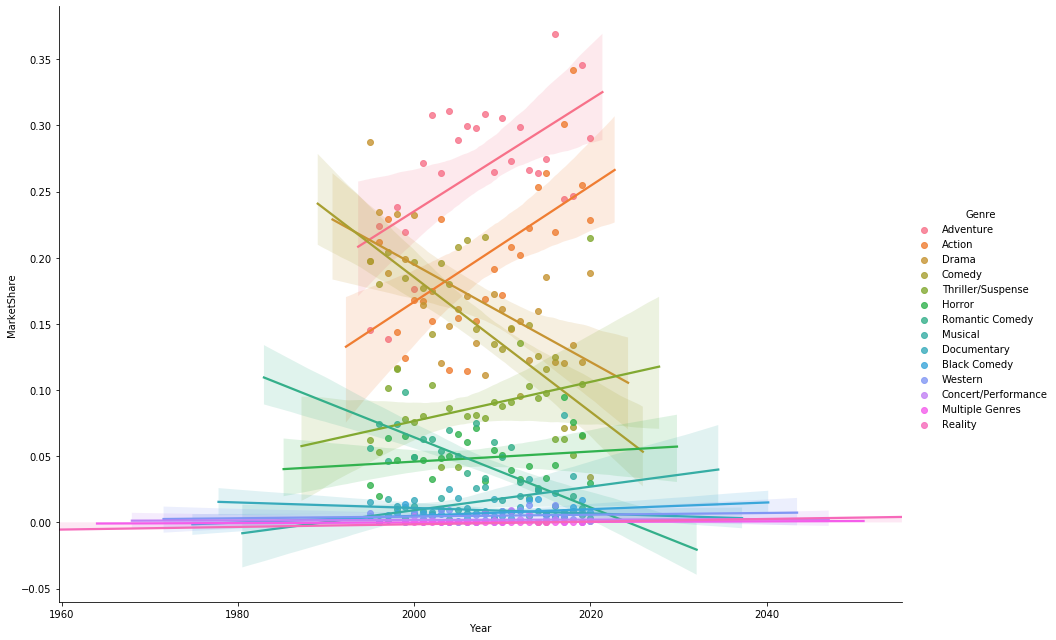

In [277]:
import seaborn as sns
 
# Use the 'hue' argument to provide a factor variable
sns.lmplot(x='Year',y='MarketShare',data=df_genre_sub,height=9, aspect=10/7,
           fit_reg=True, hue='Genre', legend=True)


In [47]:
# Most Profitable Movies, Based on Absolute Profit on Worldwide Gross

In [28]:
html_page = requests.get('https://www.the-numbers.com/movie/budgets')
soup = BeautifulSoup(html_page.content,'html.parser')

In [29]:
tables=soup.find_all('table')

In [30]:
profitable_movies=pd.read_html(str(tables[2]))[0]

In [286]:
profitable_movies.dropna(inplace=True)
profitable_movies

,Release Date,Movie,Approx. Income,Approx. Expense,Profit
0,"Dec 18, 2009",Avatar,"$1,796,427,464","$328,262,000","$1,468,165,464"
2,"Apr 26, 2019",Avengers: Endgame,"$1,479,816,843","$475,560,000","$1,004,256,843"
4,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$1,224,827,707","$381,704,000","$843,123,707"
6,"Nov 22, 2013",Frozen,"$1,042,311,056","$245,904,000","$796,407,056"
8,"Nov 18, 2005",Harry Potter and the Goblet of Fire,"$997,569,652","$208,064,000","$789,505,652"
10,"Apr 27, 2018",Avengers: Infinity War,"$1,125,651,663","$368,812,000","$756,839,663"
12,"May 4, 2012",The Avengers,"$998,554,456","$300,290,000","$698,264,456"
14,"Jun 12, 2015",Jurassic World,"$962,588,221","$287,756,000","$674,832,221"
16,"Jul 15, 2011",Harry Potter and the Deathly Hallows: Part II,"$833,252,878","$177,306,000","$655,946,878"
18,"Jul 3, 2013",Despicable Me 2,"$735,831,589","$143,056,000","$592,775,589"


In [281]:
# convert dframe to tuple
tuple_profitable=list(profitable_movies.itertuples(index=False,name=None))

In [282]:
tuple_profitable[0]

('Dec 18, 2009', 'Avatar', '$1,796,427,464', '$328,262,000', '$1,468,165,464')

In [74]:
import mysql.connector
from mysql.connector import errorcode
import config
cnx = mysql.connector.connect(
    host = config.my_cred['host'],
    user = config.my_cred['user'],
    passwd = config.my_cred['passwd']
)

print(cnx)

In [75]:
cursor = cnx.cursor()

In [90]:
DB_NAME = 'movies'

TABLES = {}
TABLES['profitable'] = (
    "CREATE TABLE profitable ("
    "  Release_Date varchar(30) NOT NULL,"
    "  Movie varchar(190) NOT NULL,"
    "  Approx_Income varchar(12) NOT NULL,"
    "  Approx_Expense varchar(12) NOT NULL,"
    "  Profit  varchar(12) NOT NULL"
    ") ENGINE=InnoDB")

In [91]:
try:
    cursor.execute("USE {}".format(DB_NAME))

#if the previous line fails because there isn't a db by that name run this line

except mysql.connector.Error as err:
    print("Database {} does not exists.".format(DB_NAME))
    if err.errno == errorcode.ER_BAD_DB_ERROR:
        create_database(cursor, DB_NAME)
        print("Database {} created successfully.".format(DB_NAME))
        cnx.database = DB_NAME
    else:
        print(err)
        exit(1)
        
for table_name in TABLES:
    table_description = TABLES[table_name]
    try:
        print("Creating table {}: ".format(table_name), end='')
        cursor.execute(table_description)
    except mysql.connector.Error as err:
        if err.errno == errorcode.ER_TABLE_EXISTS_ERROR:
            print("already exists.")
        else:
            print(err.msg)
    else:
        print("OK")

# cursor.close()
# cnx.close()

Creating table profitable: OK


In [92]:
cursor.executemany(
      """INSERT INTO profitable
      (Release_Date, Movie , Approx_Income, Approx_Expense, Profit)
      VALUES (%s,%s,%s,%s,%s)""",
      tuple_profitable)
cnx.commit()


In [60]:
# Biggest Money Losers, Based on Absolute Loss on Worldwide Earnings

In [101]:
html_page = requests.get('https://www.the-numbers.com/movie/budgets')
soup = BeautifulSoup(html_page.content,'html.parser')

In [102]:
tables=soup.find_all('table')

In [103]:
money_losers=pd.read_html(str(tables[4]))[0]

In [113]:
money_losers.dropna(inplace=True)
money_losers.drop(columns='Unnamed: 0',inplace=True)

In [114]:
# convert dframe to tuple
tuple_loss=list(money_losers.itertuples(index=False,name=None))
tuple_loss

[('Mar 11, 2011',
  'Mars Needs Moms',
  '$26,754,640',
  '$170,166,000',
  '-$143,411,360'),
 ('Mar 9, 2012',
  'John Carter',
  '$180,857,835',
  '$295,824,000',
  '-$114,966,165'),
 ('May 12, 2017',
  'King Arthur: Legend of the Sword',
  '$84,936,081',
  '$199,580,000',
  '-$114,643,919'),
 ('Sep 30, 2016',
  'Deepwater Horizon',
  '$78,201,830',
  '$189,348,000',
  '-$111,146,170'),
 ('Jan 13, 2017',
  'Monster Trucks',
  '$39,953,396',
  '$149,450,000',
  '-$109,496,604'),
 ('Mar 1, 2013',
  'Jack the Giant Slayer',
  '$123,521,590',
  '$228,504,000',
  '-$104,982,410'),
 ('Dec 17, 2010',
  'How Do You Know?',
  '$35,567,429',
  '$140,454,000',
  '-$104,886,571'),
 ('Dec 25, 2013', '47 Ronin', '$93,230,564', '$189,988,000', '-$96,757,436'),
 ('Feb 6, 2015',
  'Jupiter Ascending',
  '$110,744,962',
  '$206,582,000',
  '-$95,837,038'),
 ('Apr 21, 2017', 'The Promise', '$6,231,500', '$99,886,000', '-$93,654,500'),
 ('Jul 19, 2013', 'R.I.P.D.', '$55,183,070', '$147,884,000', '-$92,70

In [93]:
import mysql.connector
from mysql.connector import errorcode
import config
cnx = mysql.connector.connect(
    host = config.my_cred['host'],
    user = config.my_cred['user'],
    passwd = config.my_cred['passwd']
)
cnx.database = 'movies'
print(cnx)

In [94]:
cursor = cnx.cursor()

In [107]:
DB_NAME = 'movies'

TABLES = {}
TABLES['loss'] = (
    "CREATE TABLE loss ("
    "  Release_Date varchar(30) NOT NULL,"
    "  Movie varchar(190) NOT NULL,"
    "  Approx_Income varchar(12) NOT NULL,"
    "  Approx_Expense varchar(12) NOT NULL,"
    "  loss varchar(12) NOT NULL"
    ") ENGINE=InnoDB")

In [108]:
try:
    cursor.execute("USE {}".format(DB_NAME))

#if the previous line fails because there isn't a db by that name run this line

except mysql.connector.Error as err:
    print("Database {} does not exists.".format(DB_NAME))
    if err.errno == errorcode.ER_BAD_DB_ERROR:
        create_database(cursor, DB_NAME)
        print("Database {} created successfully.".format(DB_NAME))
        cnx.database = DB_NAME
    else:
        print(err)
        exit(1)
        
for table_name in TABLES:
    table_description = TABLES[table_name]
    try:
        print("Creating table {}: ".format(table_name), end='')
        cursor.execute(table_description)
    except mysql.connector.Error as err:
        if err.errno == errorcode.ER_TABLE_EXISTS_ERROR:
            print("already exists.")
        else:
            print(err.msg)
    else:
        print("OK")

# cursor.close()
# cnx.close()

Creating table loss: OK


In [115]:
cursor.executemany(
      """INSERT INTO loss (Release_Date, Movie , Approx_Income, Approx_Expense, loss)
      VALUES (%s,%s,%s,%s,%s)""",
      tuple_loss)
cnx.commit()

In [40]:
# import pandas as pd
# from bs4 import BeautifulSoup
# soup = BeautifulSoup('html_page', 'lxml') # Parse the HTML as a string
# table = soup.find_all('table')[0] # Grab the first table
# new_table = pd.DataFrame(columns=range(0,2), index = [0]) # I know the size 
# row_marker = 0
# for row in table.find_all('tr'):
#     column_marker = 0
#     columns = row.find_all('td')
#     for column in columns:
#         new_table.iat[row_marker,column_marker] = column.get_text()
#         column_marker += 1
    
# new_table

In [41]:
# adventure_movies = soup.find('div',{'id':'page_filling_chart'})
# tables=adventure_movies.find_all('table')

In [14]:
# data=[]

# rows=tables[0].findAll('tr')
# for tr in rows:
#     cols=tr.findAll('td')
#     text_tuple = tuple([td.text.replace('\n','').replace('\xa0','').replace(' ','') for td in cols])
#     data.append(text_tuple)



In [17]:
# import pandas as pd
# a=pd.DataFrame(data)

In [19]:
# a.head()